# TP 1 : Computational Geometry 

The following notebook is inspired from Frédéric Chazal. 

We can use the GUDHI Library to automatize the theory you have seen in your lessons. Let's see how it works !
First, we need to tell python what Libraries we are going to use.

In [1]:
import numpy as np
import gudhi as gd
import random as rd
import matplotlib.pyplot as plt

%matplotlib inline

## Exercise 1 - How do Simplicial Complexes and Simplex Trees work ?

In Gudhi, (filtered) simplicial complexes are encoded through a data structure called simplex tree. Here is a very simple example illustrating the use of simplex tree to represent simplicial complexes. See the Gudhi documentation for a complete list of functionalities. Try the following code and a few other functionalities from the documentation to get used to the Simplex Tree data structure.

In [3]:
st = gd.SimplexTree() # Create an empty simplicial complex

# Simplicies can be inserted 1 by 1
# Vertices are indexed by integers
if st.insert([0,1]):
    print("First simplex inserted!")
st.insert([1,2])
st.insert([2,3])
st.insert([3,0])
st.insert([0,2])
st.insert([3,1])

First simplex inserted!


True

**Q 1):** In the last example, have you really given a simplicial complex to $st$ ? How did GUDHI make it work ?

Given a simplicial complex $st$, we can read all of its component through the following code :

In [4]:
L = st.get_filtration() # Get a list with all simplices
for simplex in L:
    print(simplex)

([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([0, 2], 0.0)
([1, 2], 0.0)
([3], 0.0)
([0, 3], 0.0)
([1, 3], 0.0)
([2, 3], 0.0)


**Q 2):** (Once you have been explained what filtrations are) : What do the number beside the components indicate ? What filtration do we have here ?

We can be more explicit and give filtration values to the faces, as in following code :

In [ ]:
# Insert the 2-skeleton, giving some filtration values to the faces
st.insert([0,1,2],filtration=0.1)
st.insert([1,2,3],filtration=0.2)
st.insert([0,2,3],filtration=0.3)
st.insert([0,1,3],filtration=0.4)

**Q 3)** What filtration value does GUDHI give to the subfaces of a face you insert ? Try it yourself. We insert the face $[2,3,4]$. Display the filtration values of its subfaces.

In [5]:
st.insert([2,3,4],filtration=0.7)
#Your turn !

True

The filtration value of a simplex can be changed in the following way

In [6]:
st.assign_filtration((2,3,4),1.0)

L = st.get_filtration()
for simplex in L:
    print(simplex)

([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([0, 2], 0.0)
([1, 2], 0.0)
([3], 0.0)
([0, 3], 0.0)
([1, 3], 0.0)
([2, 3], 0.0)
([4], 0.7)
([2, 4], 0.7)
([3, 4], 0.7)
([2, 3, 4], 1.0)


**Warning!** Take care that after changing the filtration value of a simplex, the result could no longer be a filtration, as illustrated below :

In [8]:
print("Giving the edge [3,4] the value 1.5:")
st.assign_filtration((3,4),1.5)
L = st.get_filtration()
for simplex in L:
    print(simplex)
print("The result is no longer a filtration : [3,4] has a higher value than its coface [2,3,4]")
print("To fix the problem, use make_filtration_non_decreasing()")
st.make_filtration_non_decreasing()
L = st.get_filtration()
for simplex in L:
    print(simplex)

Giving the edge [3,4] the value 1.5:
([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([0, 2], 0.0)
([1, 2], 0.0)
([3], 0.0)
([0, 3], 0.0)
([1, 3], 0.0)
([2, 3], 0.0)
([4], 0.7)
([2, 4], 0.7)
([2, 3, 4], 1.0)
([3, 4], 1.5)
The result is no longer a filtration : [3,4] has a higher value than its coface [2,3,4]
To fix the problem, use make_filtration_non_decreasing()
([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([0, 2], 0.0)
([1, 2], 0.0)
([3], 0.0)
([0, 3], 0.0)
([1, 3], 0.0)
([2, 3], 0.0)
([4], 0.7)
([2, 4], 0.7)
([3, 4], 1.5)
([2, 3, 4], 1.5)


Many operations can be done on simplicial complexes. See the GUDHI documentation https://gudhi.inria.fr/python/latest/simplex_tree_ref.html  for more details. 

In [9]:
# Many operations can be done on simplicial complexes, see also the Gudhi documentation and examples
print("dimension=",st.dimension())
print("filtration value of [1,2]=",st.filtration([1,2]))
print("filtration value of [4,2]=",st.filtration([4,2]))
print("num_simplices=", st.num_simplices())
print("num_vertices=", st.num_vertices())
print("skeleton[2]=", st.get_skeleton(2))
print("skeleton[1]=", st.get_skeleton(1))
print("skeleton[0]=", st.get_skeleton(0))
L = st.get_skeleton(1)
for simplex in L:
    print(simplex)

dimension= 2
filtration value of [1,2]= 0.0
filtration value of [4,2]= 0.7
num_simplices= 14
num_vertices= 5
skeleton[2]= <generator object at 0x0000027A18899360>
skeleton[1]= <generator object at 0x0000027A18899360>
skeleton[0]= <generator object at 0x0000027A18899360>
([0, 1], 0.0)
([0, 2], 0.0)
([0, 3], 0.0)
([0], 0.0)
([1, 2], 0.0)
([1, 3], 0.0)
([1], 0.0)
([2, 3], 0.0)
([2, 4], 0.7)
([2], 0.0)
([3, 4], 1.5)
([3], 0.0)
([4], 0.7)


## Exercise 2 : Automatisation of your last TD and your first GUDHI persistence diagram

**Part 1 - Your last TD session**

In your last TD Lesson, you had to compute the Betti Numbers of the following simplicial complexes. We could have used GUDHI to answer this question (but you would not have understood as much !)

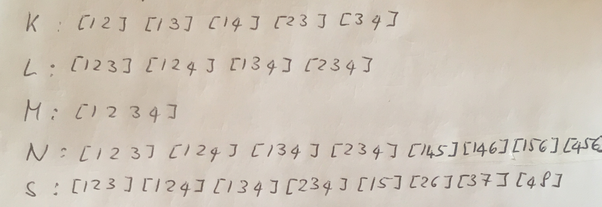

The first thing to do is to build the simplex tree of $K$; your turn to work !

In [11]:
st = gd.SimplexTree() #Create an empty simplex tree
#Your turn ! Fill st like K.



In order to do so, GUDHI needs to compute the persistence diagram first. We use it as a black box for now.

In [ ]:
# To compute the persistence diagram of the filtered complex
# By default it stops at dimension-1, use persistence_dim_max=True
# to compute homology in all dimensions
## Here, for the moment, we use it as a preprocessing step to compute Betti numbers. 
diag = st.persistence(persistence_dim_max=True)

The betti numbers are then easily obtained :

In [ ]:
print(st.betti_numbers())

Now, do the same for $L,M,N$ and $S$. I hope you had the same results last week.

In [ ]:
#L



In [ ]:
#M



In [ ]:
#N



In [ ]:
#S



**Part 2 - GUDHI and persistence diagrams**

In this part, we will study a $d$-dimensional sphere - with $d = 3$. First, fill $st$ as a sphere with your favorite filtration values.

In [15]:
st = gd.SimplexTree()
#Your Turn !


([0], 0.1)
([1], 0.1)
([0, 1], 0.1)
([2], 0.1)
([0, 2], 0.1)
([1, 2], 0.1)
([0, 1, 2], 0.1)
([3], 0.2)
([1, 3], 0.2)
([2, 3], 0.2)
([1, 2, 3], 0.2)
([0, 3], 0.3)
([0, 2, 3], 0.3)
([0, 1, 3], 0.4)
([4], 0.7)
([2, 4], 0.7)
([3, 4], 0.7)
([2, 3, 4], 0.7)


Let's see what information the persistence diagram contains in GUDHI :

In [16]:
# Display each interval as (dimension, (birth, death))
diag = st.persistence(persistence_dim_max=True)
print(diag)

[(2, (0.4, inf)), (0, (0.1, inf))]


As you have seen in your lessons, they are two classic way of representing persistence modules in $\mathbb{R}^2$. 
Here we use the following documentation https://gudhi.inria.fr/python/latest/persistence_graphical_tools_ref.html

First, there are barcodes : 

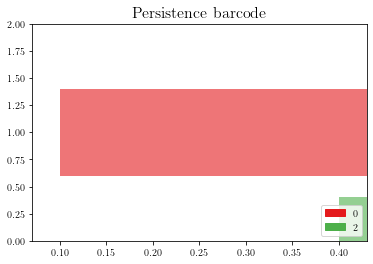

In [20]:
gd.plot_persistence_barcode(diag, legend = True)
plt.show()

And then the persistence diagrams themselves : 

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

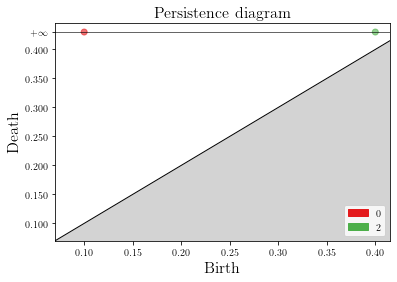

In [21]:
gd.plot_persistence_diagram(diag, legend = True)
plt.plot()

Then fill the sphere to obtain a ball, with the last simplex having a greater filtration value than all the others.
What persistence diagram do you obtain ?

In [ ]:
#Your turn !



gd.plot_persistence_diagram(diag, legend = True)
plt.plot()

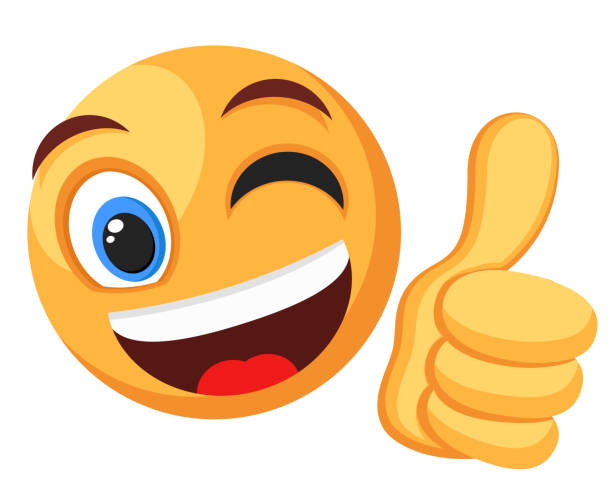 Simply astonishing !

**Q 1)** How do you get the Betti Numbers from the persistent barcodes/diagrams ? How do they depend on the filtration values ?

## Exercize 3 - A new kind of Filtration 

Most of the time in Topological Data Analysis, the complex itself is not what matters the most; it is filtration values and the persistence diagrams. To show that, we focus on more practical examples. Our data set will be that of a noisy circle in $\mathbb{R}^2$.

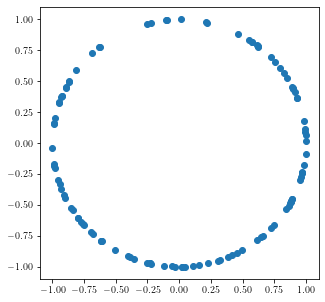

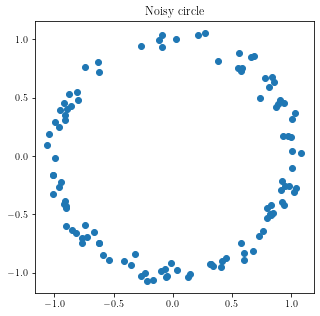

In [79]:
def circle_embedding(theta):
    return np.array([np.cos(theta),np.sin(theta)])

n= 110 #Number of points

pt_cloud = circle_embedding(2*np.pi*np.random.uniform(size =n))
plt.figure(figsize=(5,5)) 
plt.scatter(pt_cloud[0,:], pt_cloud[1,:])
plt.show()

#Then we add noise
eps = 0.05
noise = eps*np.random.randn(2,n)
pt_cloud = pt_cloud + noise
plt.figure(figsize=(5,5)) 
plt.scatter(pt_cloud[0,:], pt_cloud[1,:])
plt.title("Noisy circle")
plt.show()

In a Vietoris-Rips filtration, the filtration value of a simplex $[x_1, \dots x_d]$ is $\mathrm{max}(|| x_i - x_j ||)_{i < j}$.

**Q3)** What is the dimension of this simplicial complex ? Should we reduce it ?

The following code compute the simplicial tree of our circle equiped with the Vietoris-Rips filtration. It is a big one ! 

**Q4)** Why do we restrict ourselves to dimension $\leq 1$ ?

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

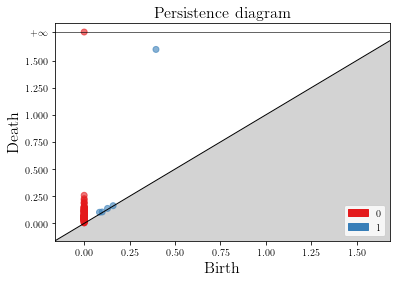

In [80]:
rips_complex = gd.RipsComplex(points=pt_cloud.transpose())

dist_mat = []
for i in range(n):
    ld = []
    for j in range(i):
        ld.append(np.linalg.norm(pt_cloud[:,i]-pt_cloud[:,j]))
    dist_mat.append(ld)
rips_complex2 = gd.RipsComplex(distance_matrix=dist_mat,max_edge_length=3.)
st = rips_complex2.create_simplex_tree(max_dimension=2)
diag = st.persistence(homology_coeff_field=2, min_persistence=0)
gd.plot_persistence_diagram(diag, legend = True)


We then compute its persistence diagram.

**Q7)** What happens when we flatten the circle ? This shows that the persistence diagram is more of geometrical data than topological.

In [81]:
#Your turn !



**Q8)** Now do the same thing for a Torus.